# Projet de bioinformatique - Découverte de médicaments dans le cadre du traitement de l'anxiété chez l'enfant

Modèle d'apprentissage automatique utilisant les données de bioactivité de la base de données ChEMBL.

## Base de données ChEMBL

La base de données ChEMBL (https://www.ebi.ac.uk/chembl/) est une base de données triée manuellement qui contient des données triées sur la bioactivité de plus de 2,3 millions de composés. Elle est compilée à partir de plus de 85 000 publications et 198 ensembles de données déposées, et les données couvrent 15 072 cibles, près de 20 millions d'activités et 33 000 indications.

(6 janvier 2022 ; ChEMBL v31)

## Libraries

In [ ]:
# Install the ChEMBL web service package ; pour récupérer les données de bioactivité de la base de données ChEMBL.
#! pip install chembl_webresource_client

# Import necessary libraries
import pandas as pd
from chembl_webresource_client.new_client import new_client

  Using cached chembl_webresource_client-0.10.8-py3-none-any.whl (55 kB)
  Using cached easydict-1.10.tar.gz (6.4 kB)
  Preparing metadata (setup.py) ... done
  Using cached requests_cache-0.7.5-py3-none-any.whl (39 kB)
  Using cached url_normalize-1.4.3-py2.py3-none-any.whl (6.8 kB)
  Created wheel for easydict: filename=easydict-1.10-py3-none-any.whl size=6492 sha256=bcb0a994858a9dad6333fbcf30928e9dbb7996a6e6baceb61c2c5412ef8ff1fe
  Stored in directory: /Users/oussama/Library/Caches/pip/wheels/0d/9a/a9/02f3a5f0c6b2c57184661770360c58db8166f5c877780e98f2
Successfully built easydict


ModuleNotFoundError: No module named 'chembl_webresource_client'

## Recherche de la protéine cible

### Recherche de cible pour CYP2C19

Chez les patients pédiatriques, les inhibiteurs sélectifs de la recapture de la sérotonine (ISRS) escitalopram et citalopram (es/citalopram) sont couramment prescrits pour traiter les troubles anxieux et dépressifs. Cependant, les études pharmacogénétiques examinant le statut de métaboliseur du CYP2C19 et les résultats du traitement par l'es/citalopram se sont largement concentrées sur les adultes.

Les métaboliseurs lents du CYP2C19 subissent plus d'effets indésirables que les métaboliseurs rapides, notamment des symptômes d'activation et connaissent une prise de poids plus rapide. Les métaboliseurs rapides répondent plus rapidement à l'es/citalopram et ont tendance à passer moins de temps dans d'éventuelles hospitalisations ultérieures.

Ainsin il existe une disparité dans les résultats du traitement par es/citalopram chez les jeunes souffrant de troubles anxieux et/ou dépressifs lorsque des stratégies de dosage standardisées ont été utilisées sans tenir compte du **statut de métaboliseur du CYP2C19**. Des essais prospectifs de plus grande envergure sont justifiés pour évaluer si une posologie adaptée de l'es/citalopram en fonction du statut du métaboliseur du CYP2C19 améliore les résultats du traitement dans cette population de patients.


Aldrich SL, Poweleit EA, Prows CA, Martin LJ, Strawn JR, Ramsey LB. Influence of CYP2C19 Metabolizer Status on Escitalopram/Citalopram Tolerability and Response in Youth With Anxiety and Depressive Disorders. Front Pharmacol. 2019 Feb 19;10:99. doi: 10.3389/fphar.2019.00099. PMID: 30837874; PMCID: PMC6389830.

In [ ]:
# Recherche de cibles pour CYP2C19
target = new_client.target
target_query = target.search('CYP2C19')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'P33261', 'xref_name': None, 'xre...",Homo sapiens,Cytochrome P450 2C19,12.0,False,CHEMBL3622,"[{'accession': 'P33261', 'component_descriptio...",SINGLE PROTEIN,9606
1,[],Homo sapiens,Cytochrome P450,1.0,False,CHEMBL4523986,"[{'accession': 'P08684', 'component_descriptio...",PROTEIN FAMILY,9606


### Récupérer les données de bioactivité pour Cytochrome P450 19A1 (id = 0 ; première ligne)

Nous allons affecter la cinquième entrée (qui correspond à la protéine cible, Cytochrome P450 19A1) à une autre variable : selected_target

In [ ]:
selected_target = targets.target_chembl_id[0]
selected_target

'CHEMBL3622'

Ici, on ne retrouve que les données de bioactivité pour Cytochrome P450 19A1 (CHEMBL3622) qui sont rapportées sous forme de valeurs de IC50 en unité nanomolaire.

La concentration inhibitrice semi-maximale (IC50) est une mesure de l'efficacité d'un composé à inhiber une fonction biologique/biochimique.

In [ ]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

In [ ]:
df = pd.DataFrame.from_dict(res)

In [ ]:
df.head(3)

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,45776,[],CHEMBL666251,Inhibition of human cytochrome P450 2C19 as S-...,A,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 2C19,9606,None,None,IC50,uM,UO_0000065,None,46.0
1,None,62460,[],CHEMBL666251,Inhibition of human cytochrome P450 2C19 as S-...,A,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 2C19,9606,None,None,IC50,uM,UO_0000065,None,26.0
2,None,66437,[],CHEMBL660386,Inhibition of Cytochrome P450 2C19,A,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 2C19,9606,None,None,IC50,uM,UO_0000065,None,177.0


Enfin, on enregistre les données de bioactivité résultantes dans un fichier CSV : bioactivity_data.csv.

In [ ]:
df.to_csv('bioactivity_data_raw.csv', index=False)

## Gestion des données manquantes

Si un composé a une valeur manquante pour la colonne standard_value, alors on ne le sélectionne pas.
La standard_value (valeur standard) correspond à la puissance du médicament. Plus la valeur est basse, plus le médicament a d'effet pour inhiber la cible.

Ce que l'on cherche c'est la standard_value la plus basse possible : inhiber 50% de la protéine en utilisant un médicament A à une plus faible concentration qu'un médicament B.

In [ ]:
df2 = df[df.standard_value.notna()]
df2

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,45776,[],CHEMBL666251,Inhibition of human cytochrome P450 2C19 as S-...,A,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 2C19,9606,None,None,IC50,uM,UO_0000065,None,46.0
1,None,62460,[],CHEMBL666251,Inhibition of human cytochrome P450 2C19 as S-...,A,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 2C19,9606,None,None,IC50,uM,UO_0000065,None,26.0
2,None,66437,[],CHEMBL660386,Inhibition of Cytochrome P450 2C19,A,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 2C19,9606,None,None,IC50,uM,UO_0000065,None,177.0
3,None,347544,[],CHEMBL660383,Inhibitory effect on human recombinant liver c...,A,None,None,BAO_0000190,BAO_0000019,...,Homo sapiens,Cytochrome P450 2C19,9606,None,None,IC50,uM,UO_0000065,None,15.0
4,None,348954,[],CHEMBL660383,Inhibitory effect on human recombinant liver c...,A,None,None,BAO_0000190,BAO_0000019,...,Homo sapiens,Cytochrome P450 2C19,9606,None,None,IC50,uM,UO_0000065,None,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4229,None,23308583,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4843558,Inhibition of CYP2C19 in human liver microsome...,A,None,None,BAO_0000190,BAO_0000251,...,Homo sapiens,Cytochrome P450 2C19,9606,None,None,IC50,uM,UO_0000065,None,1.56
4230,None,23308584,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4843558,Inhibition of CYP2C19 in human liver microsome...,A,None,None,BAO_0000190,BAO_0000251,...,Homo sapiens,Cytochrome P450 2C19,9606,None,None,IC50,uM,UO_0000065,None,1.3
4231,None,23309636,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4843813,Inhibition of recombinant human CYP2C19 expres...,A,None,None,BAO_0000190,BAO_0000019,...,Homo sapiens,Cytochrome P450 2C19,9606,None,None,IC50,uM,UO_0000065,None,50.0
4232,None,23313271,[],CHEMBL4844567,Inhibition of CYP2C19 (unknown origin),A,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Cytochrome P450 2C19,9606,None,None,IC50,uM,UO_0000065,None,10.0


Il n'y a 76 données manquantes.

## Pré-traitement des données de bioactivité

### Labellisation des composés comme étant soit actifs, soit inactifs, soit intermédiaires

- Les données relatives à la bioactivité sont exprimées dans l'unité IC50.
- Les composés dont les valeurs sont inférieures à 1000 nM seront considérés comme actifs.
- Les composés dont les valeurs sont comprises entre 1 000 et 10 000 nM seront qualifiées de intermédiaires. 
- Les composés dont les valeurs sont supérieures à 10 000 nM seront considérés comme inactifs.

In [ ]:
bioactivity_class = []
for i in df2.standard_value:
  if float(i) >= 10000:
    bioactivity_class.append("inactive")
  elif float(i) <= 1000:
    bioactivity_class.append("active")
  else:
    bioactivity_class.append("intermediate")

### Data structure - combiner les 3 colonnes (molecule_chembl_id, canonical_smiles, standard_value) et bioactivity_class dans un DataFrame

In [ ]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2[selection]
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,7100.0
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,50000.0
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,238.0
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,57.0
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,54.0
...,...,...,...
2907,CHEMBL4874928,C=C[C@@]1(C)CC(=O)C2=C(CC[C@H]3C(C)(C)CCC[C@]2...,7900.0
2908,CHEMBL4852023,CC(C)c1cc(O)c2c(c1)CC[C@H]1C(C)(C)CCC[C@]21C,3700.0
2909,CHEMBL75,CC(=O)N1CCN(c2ccc(OC[C@H]3CO[C@](Cn4ccnc4)(c4c...,2400.0
2910,CHEMBL1200374,C=C1C[C@@H]2[C@H](CC[C@]3(C)C(=O)CC[C@@H]23)[C...,23.0


In [ ]:
bioactivity_class = pd.Series(bioactivity_class, name='bioactivity_class')
df4 = pd.concat([df3, bioactivity_class], axis=1)
df4

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,7100.0,intermediate
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,50000.0,inactive
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,238.0,active
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,57.0,active
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,54.0,active
...,...,...,...,...
2197,NaN,NaN,NaN,inactive
2215,NaN,NaN,NaN,inactive
2217,NaN,NaN,NaN,inactive
2338,NaN,NaN,NaN,active


Sauvegarde des données dans un fichier CSV

In [ ]:
df4.to_csv('bioactivity_data_preprocessed.csv', index=False)

NameError: name 'df4' is not defined

In [ ]:
! ls -l | grep bioactivity

-rw-r--r--@ 1 oussama  staff   204598  6 jan 10:27 bioactivity_data_preprocessed.csv
-rw-r--r--  1 oussama  staff  1445319  6 jan 10:27 bioactivity_data_raw.csv


## Calcul des descripteurs et analyse des données exploratoires

In [ ]:
# Install rdkit ; il faut changer d'environnement car il y a des problèmes de compatibilités
# ! conda create -c rdkit -n test python=3.7 rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

## Chargement des données de bioactivité précédentes

In [35]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('bioactivity_data_preprocessed.csv')
df = df[df.canonical_smiles.notna()] # les données NAN perturbent lipinski()
df

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,7100.0,intermediate
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,50000.0,inactive
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,238.0,active
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,57.0,active
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,54.0,active
...,...,...,...,...
2831,CHEMBL4874928,C=C[C@@]1(C)CC(=O)C2=C(CC[C@H]3C(C)(C)CCC[C@]2...,7900.0,NaN
2832,CHEMBL4852023,CC(C)c1cc(O)c2c(c1)CC[C@H]1C(C)(C)CCC[C@]21C,3700.0,NaN
2833,CHEMBL75,CC(=O)N1CCN(c2ccc(OC[C@H]3CO[C@](Cn4ccnc4)(c4c...,2400.0,NaN
2834,CHEMBL1200374,C=C1C[C@@H]2[C@H](CC[C@]3(C)C(=O)CC[C@@H]23)[C...,23.0,NaN


## Calculer les descripteurs de Lipinski

Christopher Lipinski, un scientifique de Pfizer, a mis au point un ensemble de règles empiriques pour évaluer le caractère "médicamenteux" des composés.

Ce caractère médicamenteux est basé sur l'absorption, la distribution, le métabolisme et l'excrétion (ADME), également connu sous le nom de profil pharmacocinétique. Lipinski a analysé tous les médicaments oralement actifs approuvés par la FDA pour formuler ce qui sera connu sous le nom de "Rule-of-Five" ou "Lipinski's Rule".

La règle de Lipinski stipulait ce qui suit :
- Poids moléculaire < 500 Dalton
- coefficient de partage octanol-eau (LogP) < 5
- Donneurs de liaisons hydrogènes < 5
- Accepteurs de liaisons hydrogènes < 10 

Lipinski CA. Lead- and drug-like compounds: the rule-of-five revolution. Drug Discov Today Technol. 2004 Dec;1(4):337-41. doi: 10.1016/j.ddtec.2004.11.007. PMID: 24981612.

### Libraries

In [ ]:
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### Calculer les descripteurs

In [ ]:
# Inspiré par codeocean
# https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [ ]:
df_lipinski = lipinski(df.canonical_smiles)

### Combiner les DataFrames

In [ ]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,329.528,4.28820,2.0,2.0
1,315.501,3.89810,2.0,2.0
2,412.306,5.70542,0.0,3.0
3,319.383,4.63450,0.0,3.0
4,321.811,4.58780,0.0,3.0
...,...,...,...,...
2831,286.459,5.46460,0.0,1.0
2832,286.459,5.54580,1.0,1.0
2833,531.440,4.20580,0.0,7.0
2834,296.410,4.02950,0.0,2.0


In [ ]:
df

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,7100.0,intermediate
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,50000.0,inactive
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,238.0,active
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,57.0,active
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,54.0,active
...,...,...,...,...
2831,CHEMBL4874928,C=C[C@@]1(C)CC(=O)C2=C(CC[C@H]3C(C)(C)CCC[C@]2...,7900.0,NaN
2832,CHEMBL4852023,CC(C)c1cc(O)c2c(c1)CC[C@H]1C(C)(C)CCC[C@]21C,3700.0,NaN
2833,CHEMBL75,CC(=O)N1CCN(c2ccc(OC[C@H]3CO[C@](Cn4ccnc4)(c4c...,2400.0,NaN
2834,CHEMBL1200374,C=C1C[C@@H]2[C@H](CC[C@]3(C)C(=O)CC[C@@H]23)[C...,23.0,NaN


In [ ]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [ ]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,7100.0,intermediate,329.528,4.28820,2.0,2.0
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,50000.0,inactive,315.501,3.89810,2.0,2.0
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,238.0,active,412.306,5.70542,0.0,3.0
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,57.0,active,319.383,4.63450,0.0,3.0
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,54.0,active,321.811,4.58780,0.0,3.0
...,...,...,...,...,...,...,...,...
2831,CHEMBL4874928,C=C[C@@]1(C)CC(=O)C2=C(CC[C@H]3C(C)(C)CCC[C@]2...,7900.0,NaN,286.459,5.46460,0.0,1.0
2832,CHEMBL4852023,CC(C)c1cc(O)c2c(c1)CC[C@H]1C(C)(C)CCC[C@]21C,3700.0,NaN,286.459,5.54580,1.0,1.0
2833,CHEMBL75,CC(=O)N1CCN(c2ccc(OC[C@H]3CO[C@](Cn4ccnc4)(c4c...,2400.0,NaN,531.440,4.20580,0.0,7.0
2834,CHEMBL1200374,C=C1C[C@@H]2[C@H](CC[C@]3(C)C(=O)CC[C@@H]23)[C...,23.0,NaN,296.410,4.02950,0.0,2.0


### Convertir IC50 en pIC50

Pour permettre aux données de la CI50 d'être distribuées plus uniformément, nous allons convertir la CI50 à l'échelle logarithmique négative qui est essentiellement -log10(CI50).

Cette nouvelle fonction pIC50() accepte un DataFrame en entrée et va :
- Prendre les valeurs IC50 de la colonne standard_value et les convertir de nM en M en multipliant la valeur par 10$^{-9}$.
- Prendre la valeur molaire et appliquer -log10
- Supprimer la colonne standard_value.
- Créer une nouvelle colonne "pIC50".

In [ ]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

Remarque : les valeurs supérieures à 100 000 000 seront fixées à 100 000 000, sinon la valeur logarithmique négative deviendra négative.

In [ ]:
df_combined.standard_value.describe()

count    2.836000e+03
mean     2.214962e+10
std      7.303889e+11
min      0.000000e+00
25%      1.068625e+02
50%      1.091340e+03
75%      7.617500e+03
max      3.388442e+13
Name: standard_value, dtype: float64

In [ ]:
-np.log10( (10**-9)* 100000000 )

1.0

In [ ]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [ ]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

Appliquer la fonction norm_value() d'abord afin que les valeurs de la colonne standard_value soient normalisées.

In [ ]:
df_norm = norm_value(df_combined)
df_norm

/Users/oussama/opt/anaconda3/envs/test/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # Remove the CWD from sys.path while we load stuff.


,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,intermediate,329.528,4.28820,2.0,2.0,7100.0
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,inactive,315.501,3.89810,2.0,2.0,50000.0
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,active,412.306,5.70542,0.0,3.0,238.0
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,active,319.383,4.63450,0.0,3.0,57.0
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,active,321.811,4.58780,0.0,3.0,54.0
...,...,...,...,...,...,...,...,...
2831,CHEMBL4874928,C=C[C@@]1(C)CC(=O)C2=C(CC[C@H]3C(C)(C)CCC[C@]2...,NaN,286.459,5.46460,0.0,1.0,7900.0
2832,CHEMBL4852023,CC(C)c1cc(O)c2c(c1)CC[C@H]1C(C)(C)CCC[C@]21C,NaN,286.459,5.54580,1.0,1.0,3700.0
2833,CHEMBL75,CC(=O)N1CCN(c2ccc(OC[C@H]3CO[C@](Cn4ccnc4)(c4c...,NaN,531.440,4.20580,0.0,7.0,2400.0
2834,CHEMBL1200374,C=C1C[C@@H]2[C@H](CC[C@]3(C)C(=O)CC[C@@H]23)[C...,NaN,296.410,4.02950,0.0,2.0,23.0


In [ ]:
df_norm.standard_value_norm.describe()

count    2.836000e+03
mean     3.249726e+05
std      4.997506e+06
min      0.000000e+00
25%      1.068625e+02
50%      1.091340e+03
75%      7.617500e+03
max      1.000000e+08
Name: standard_value_norm, dtype: float64

In [ ]:
df_final = pIC50(df_norm)
df_final

/Users/oussama/opt/anaconda3/envs/test/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.
/Users/oussama/opt/anaconda3/envs/test/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  del sys.path[0]


,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,intermediate,329.528,4.28820,2.0,2.0,5.148742
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,inactive,315.501,3.89810,2.0,2.0,4.301030
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,active,412.306,5.70542,0.0,3.0,6.623423
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,active,319.383,4.63450,0.0,3.0,7.244125
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,active,321.811,4.58780,0.0,3.0,7.267606
...,...,...,...,...,...,...,...,...
2831,CHEMBL4874928,C=C[C@@]1(C)CC(=O)C2=C(CC[C@H]3C(C)(C)CCC[C@]2...,NaN,286.459,5.46460,0.0,1.0,5.102373
2832,CHEMBL4852023,CC(C)c1cc(O)c2c(c1)CC[C@H]1C(C)(C)CCC[C@]21C,NaN,286.459,5.54580,1.0,1.0,5.431798
2833,CHEMBL75,CC(=O)N1CCN(c2ccc(OC[C@H]3CO[C@](Cn4ccnc4)(c4c...,NaN,531.440,4.20580,0.0,7.0,5.619789
2834,CHEMBL1200374,C=C1C[C@@H]2[C@H](CC[C@]3(C)C(=O)CC[C@@H]23)[C...,NaN,296.410,4.02950,0.0,2.0,7.638272


In [ ]:
df_final.pIC50.describe()

count    2836.000000
mean             inf
std              NaN
min         1.000000
25%         5.118191
50%         5.962040
75%         6.971179
max              inf
Name: pIC50, dtype: float64

### Supprimer la classe de bioactivité "intermédiaire"

In [ ]:
df_2class = df_final[df_final.bioactivity_class != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,inactive,315.501,3.89810,2.0,2.0,4.301030
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,active,412.306,5.70542,0.0,3.0,6.623423
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,active,319.383,4.63450,0.0,3.0,7.244125
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,active,321.811,4.58780,0.0,3.0,7.267606
6,CHEMBL41761,CCn1ccc2cc(C(c3ccc(F)cc3)n3ccnc3)ccc21,active,319.383,4.63450,0.0,3.0,7.387216
...,...,...,...,...,...,...,...,...
2831,CHEMBL4874928,C=C[C@@]1(C)CC(=O)C2=C(CC[C@H]3C(C)(C)CCC[C@]2...,NaN,286.459,5.46460,0.0,1.0,5.102373
2832,CHEMBL4852023,CC(C)c1cc(O)c2c(c1)CC[C@H]1C(C)(C)CCC[C@]21C,NaN,286.459,5.54580,1.0,1.0,5.431798
2833,CHEMBL75,CC(=O)N1CCN(c2ccc(OC[C@H]3CO[C@](Cn4ccnc4)(c4c...,NaN,531.440,4.20580,0.0,7.0,5.619789
2834,CHEMBL1200374,C=C1C[C@@H]2[C@H](CC[C@]3(C)C(=O)CC[C@@H]23)[C...,NaN,296.410,4.02950,0.0,2.0,7.638272


---

## Analyse exploratoire des données (chemical space analysis) via les descripteurs Lipinski

### Libraries

In [ ]:
import pip
pip.main(['install','seaborn'])
pip.main(['install','matplotlib'])
pip.main(['install','numpy'])
pip.main(['install','scipy'])
pip.main(['install','sklearn'])

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Collecting seaborn

Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)

Requirement already satisfied: numpy!=1.24.0,>=1.17 in /Users/oussama/opt/anaconda3/envs/test/lib/python3.7/site-packages (from seaborn) (1.21.5)

Collecting matplotlib!=3.6.1,>=3.1

Using cached matplotlib-3.5.3-cp37-cp37m-macosx_10_9_x86_64.whl (7.3 MB)

Requirement already satisfied: pandas>=0.25 in /Users/oussama/opt/anaconda3/envs/test/lib/python3.7/site-packages (from seaborn) (1.3.5)

Requirement already satisfied: typing_extensions in /Users/oussama/opt/anaconda3/envs/test/lib/python3.7/site-packages (from seaborn) (4.4.0)

Requirement already satisfied: pillow>=6.2.0 in /Users/oussama/opt/anaconda3/envs/test/lib/python3.7/site-packages (from matplotlib!=3.6.1,>=3.1->seaborn) (9.3.0)

Requirement already satisfied: python-dateutil>=2.7 in /Users/oussama/opt/anaconda3/envs/test/lib/python3.7/site-packages (from matplotlib!=3.6.1,>=3.1->seaborn) (2.8.2)

Requirement already satisfied: packaging>=20.0 in /Users/oussama/opt/anaconda3/envs/test/lib/python3.7/site-packages (from matplotlib!=3.6.1,>=3.1->seaborn) (22.0)

Collecting kiwisolver>=1.0.1

Using cached kiwisolver-1.4.4-cp37-cp37m-macosx_10_9_x86_64.whl (65 kB)

Collecting fonttools>=4.22.0

Using cached fonttools-4.38.0-py3-none-any.whl (965 kB)

Collecting cycler>=0.10

Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)

Collecting pyparsing>=2.2.1

Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)

Requirement already satisfied: pytz>=2017.3 in /Users/oussama/opt/anaconda3/envs/test/lib/python3.7/site-packages (from pandas>=0.25->seaborn) (2022.7)

Requirement already satisfied: six>=1.5 in /Users/oussama/opt/anaconda3/envs/test/lib/python3.7/site-packages (from python-dateutil>=2.7->matplotlib!=3.6.1,>=3.1->seaborn) (1.16.0)

Installing collected packages: pyparsing, kiwisolver, fonttools, cycler, matplotlib, seaborn

Successfully installed cycler-0.11.0 fonttools-4.38.0 kiwisolver-1.4.4 matplotlib-3.5.3 pyparsing-3.0.9 seaborn-0.12.2

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Collecting matplotlib

Using cached matplotlib-3.5.3-cp37-cp37m-macosx_10_9_x86_64.whl (7.3 MB)

Requirement already satisfied: pillow>=6.2.0 in /Users/oussama/opt/anaconda3/envs/test/lib/python3.7/site-packages (from matplotlib) (9.3.0)

Requirement already satisfied: python-dateutil>=2.7 in /Users/oussama/opt/anaconda3/envs/test/lib/python3.7/site-packages (from matplotlib) (2.8.2)

Requirement already satisfied: packaging>=20.0 in /Users/oussama/opt/anaconda3/envs/test/lib/python3.7/site-packages (from matplotlib) (22.0)

Requirement already satisfied: numpy>=1.17 in /Users/oussama/opt/anaconda3/envs/test/lib/python3.7/site-packages (from matplotlib) (1.21.5)

Collecting kiwisolver>=1.0.1

Using cached kiwisolver-1.4.4-cp37-cp37m-macosx_10_9_x86_64.whl (65 kB)

Collecting fonttools>=4.22.0

Using cached fonttools-4.38.0-py3-none-any.whl (965 kB)

Collecting cycler>=0.10

Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)

Collecting pyparsing>=2.2.1

Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)

Requirement already satisfied: typing-extensions in /Users/oussama/opt/anaconda3/envs/test/lib/python3.7/site-packages (from kiwisolver>=1.0.1->matplotlib) (4.4.0)

Requirement already satisfied: six>=1.5 in /Users/oussama/opt/anaconda3/envs/test/lib/python3.7/site-packages (from python-dateutil>=2.7->matplotlib) (1.16.0)

Installing collected packages: pyparsing, kiwisolver, fonttools, cycler, matplotlib

Successfully installed cycler-0.11.0 fonttools-4.38.0 kiwisolver-1.4.4 matplotlib-3.5.3 pyparsing-3.0.9

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Requirement already satisfied: numpy in /Users/oussama/opt/anaconda3/envs/test/lib/python3.7/site-packages (1.21.5)

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Collecting scipy

Using cached scipy-1.7.3-cp37-cp37m-macosx_10_9_x86_64.whl (33.0 MB)

Requirement already satisfied: numpy<1.23.0,>=1.16.5 in /Users/oussama/opt/anaconda3/envs/test/lib/python3.7/site-packages (from scipy) (1.21.5)

Installing collected packages: scipy

Successfully installed scipy-1.7.3

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Collecting sklearn

Downloading sklearn-0.0.post1.tar.gz (3.6 kB)

Preparing metadata (setup.py): started

Preparing metadata (setup.py): finished with status 'done'

Building wheels for collected packages: sklearn

Building wheel for sklearn (setup.py): started

Building wheel for sklearn (setup.py): finished with status 'done'

Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2936 sha256=a2ce44aeed59b2936a9f0a155e5b875797f58c90b0960a7e03f279ca7ccee57b

Stored in directory: /Users/oussama/Library/Caches/pip/wheels/15/9a/b1/2478e73a520d596fab614693f5cd1beef4ba3db737bed1ac7d

Successfully built sklearn

Installing collected packages: sklearn

Successfully installed sklearn-0.0.post1

0

### Courbe de fréquence des 2 classes de bioactivité

In [ ]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

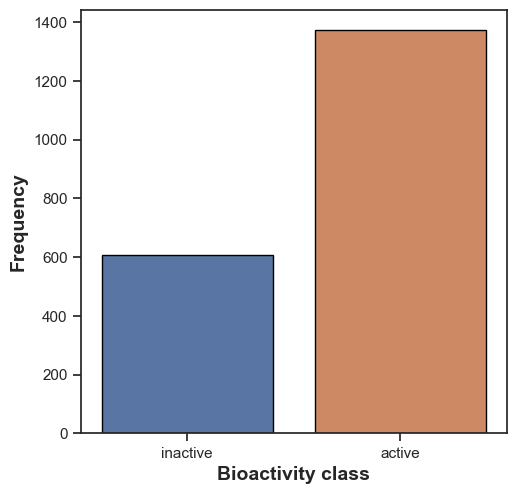

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

### Diagramme de dispersion du MW par rapport au LogP

On peut voir que les 2 classes de bioactivité couvrent des espaces chimiques similaires, comme le montre le diagramme de dispersion du MW par rapport au LogP.

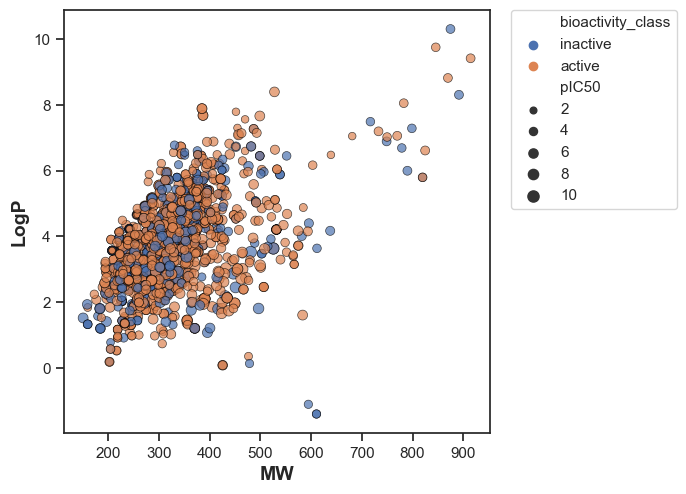

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

### **Box plots**

#### Valeur pIC50

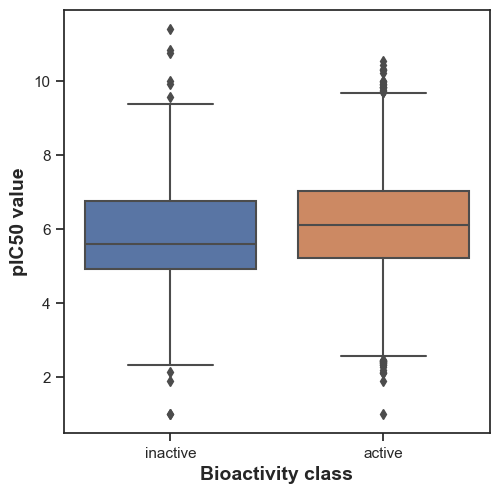

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

In [ ]:
df_2class.to_csv('df_2class.csv', index=False)

#### Analyse statistique | Test de Shapiro-Wilk

In [ ]:
import math
import numpy as np
from scipy.stats import shapiro 
from scipy.stats import lognorm

#make this example reproducible
np.random.seed(1)

ShapiroResult(statistic=0.9316189885139465, pvalue=1.0402210940370045e-29)

In [ ]:
#perform Shapiro-Wilk test for normality
shapiro(df_2class['pIC50'])

ShapiroResult(statistic=0.9911578297615051, pvalue=7.216369168894232e-10)

In [ ]:
#perform Shapiro-Wilk test for normality
shapiro(df_2class['MW'])

ShapiroResult(statistic=0.8731242418289185, pvalue=5.326827038399915e-38)

In [ ]:
#perform Shapiro-Wilk test for normality
shapiro(df_2class['LogP'])

ShapiroResult(statistic=0.9882413148880005, pvalue=6.157332456402376e-12)

In [ ]:
#perform Shapiro-Wilk test for normality
shapiro(df_2class['NumHDonors'])

ShapiroResult(statistic=0.652338981628418, pvalue=0.0)

In [ ]:
#perform Shapiro-Wilk test for normality
shapiro(df_2class['NumHAcceptors'])

ShapiroResult(statistic=0.9316189885139465, pvalue=1.0402210940370045e-29)

#### Analyse statistique | Test U de Mann-Whitney (ou Test de Student)

In [ ]:
def mannwhitney(descriptor, verbose=False):
# https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu
    
# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [ ]:
"""
def ttest(descriptor, verbose=False):
# https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import ttest_ind
    
# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = ttest_ind(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'ttest' + descriptor + '.csv'
  results.to_csv(filename)

  return results
  """

In [ ]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,486500.0,4.739741e-09,0.05,Different distribution (reject H0)


In [ ]:
#ttest('pIC50')

#### **MW**

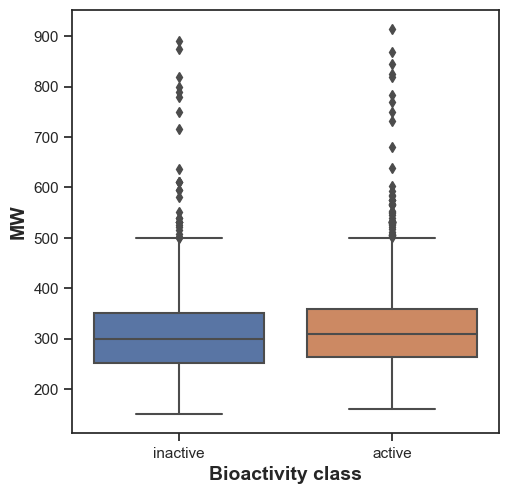

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [ ]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,456008.5,0.001111,0.05,Different distribution (reject H0)


In [ ]:
#ttest('MW')

#### **LogP**

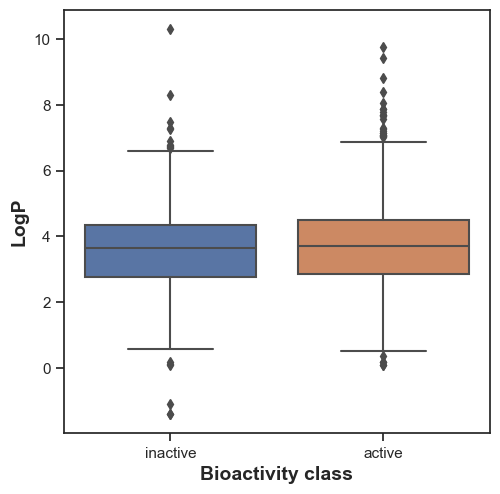

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [ ]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,430591.0,0.272438,0.05,Same distribution (fail to reject H0)


In [ ]:
#ttest('LogP')

#### **NumHDonors**

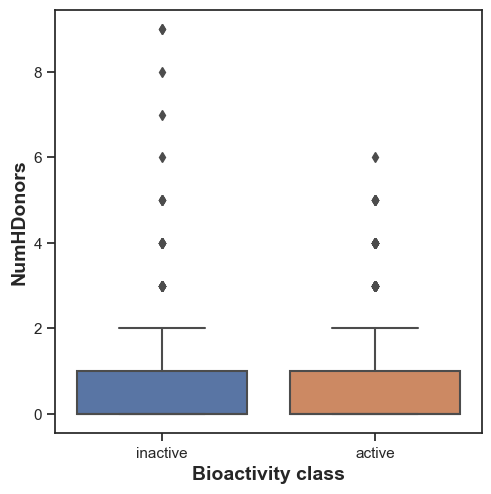

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [ ]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,449483.0,0.001753,0.05,Different distribution (reject H0)


In [ ]:
#ttest('NumHDonors')

#### **NumHAcceptors**

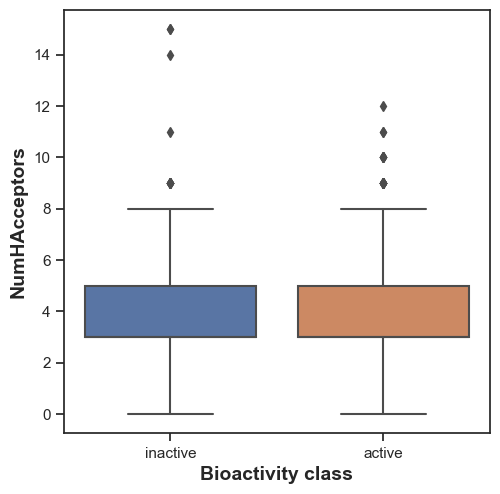

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [ ]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,424185.5,0.573403,0.05,Same distribution (fail to reject H0)


In [ ]:
#ttest('NumHAcceptors')

#### Interpréter les résultats statistiques

##### Box Plots

###### Valeurs pIC50

En examinant les valeurs pIC50, les actifs et les inactifs présentent une différence statistiquement significative, ce qui est prévisible puisque des valeurs seuils (IC50 < 1 000 nM = Actifs tandis que IC50 > 10 000 nM = Inactifs) ont été utilisées pour définir les actifs et les inactifs.

###### Lipinski's descriptors

Parmi les 4 descripteurs de Lipinski (MW, LogP, NumHDonors et NumHAcceptors), LogP et NumHAcceptors ne présentent aucune différence entre les actifs et les inactifs tandis que les 2 autres descripteurs (MW, NumHDonors) présentent une différence statistiquement significative entre les actifs et les inactifs.

## **Zip files**

In [ ]:
! zip -r results.zip . -i *.csv *.pdf

  adding: mannwhitneyu_NumHAcceptors.csv (deflated 11%)
  adding: bioactivity_data_preprocessed.csv (deflated 82%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 11%)
  adding: mannwhitneyu_MW.csv (deflated 9%)
  adding: plot_bioactivity_class.pdf (deflated 38%)
  adding: plot_LogP.pdf (deflated 38%)
  adding: plot_MW.pdf (deflated 36%)
  adding: plot_NumHDonors.pdf (deflated 38%)
  adding: plot_NumHAcceptors.pdf (deflated 38%)
  adding: plot_ic50.pdf (deflated 37%)
  adding: mannwhitneyu_pIC50.csv (deflated 10%)
  adding: bioactivity_data_raw.csv (deflated 90%)
  adding: plot_MW_vs_LogP.pdf (deflated 2%)
  adding: mannwhitneyu_LogP.csv (deflated 9%)


# Préparation du jeu de données

## **Download PaDEL-Descriptor**

In [ ]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2023-01-07 11:09:46--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2023-01-07 11:09:47--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: 'padel.zip'

padel.zip           100%[===================>]  24.57M   184KB/s    in 2m 19s  

2023-01-07 11:12:07 (181 KB/s) - 'padel.zip' saved [25768637/25768637]

--2023-01-07 11:12:07--  https://github

In [ ]:
! unzip padel.zip

Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

  inflating: PaDEL-Descriptor/lib/cdk-1.4.15.jar  
  inflating: __MACOSX/PaDEL-Descriptor/lib/._cdk-1.4.15.jar  
  inflating: PaDEL-Descriptor/lib/ambit2-smarts-2.4.7-SNAPSHOT(5).jar  
  inflating: __MACOSX/PaDEL-Descriptor/lib/._ambit2-smarts-2.4.7-SNAPSHOT(5).jar  
  inflating: PaDEL-Descriptor/lib/ambit2-core-2.4.7-SNAPSHOT(1).jar  
  inflating: __MACOSX/PaDEL-Descriptor/lib/._ambit2-core-2.4.7-SNAPSHOT(1).jar  
  inflating: PaDEL-Descriptor/lib/libPaDEL-Jobs(8).jar  
  inflating: __MACOSX/PaDEL-Descriptor/lib/._libPaDEL-Jobs(8).jar  
  inflating: PaDEL-Descriptor/lib/jgrapht-0.6.0(6).jar  
  inflating: __MACOSX/PaDEL-Descriptor/lib/._jgrapht-0.6.0(6).jar  
  inflating: PaDEL-Descriptor/lib/jama(2).jar  
  inflating: __MACOSX/PaDEL-Descriptor/lib/._jama(2).jar  
  inflating: PaDEL-Descriptor/lib/jama(3).jar  
  inflating: __MACOSX/PaDEL-Descriptor/lib/._jama(3).jar  
  inflating: PaDEL-Descriptor/lib/commons-cli-1.2(1).jar  
  inflating: __MACOSX/PaDEL-Descriptor/lib/._commons-cli-1

## Charger les données de bioactivité

Télécharger les données de bioactivité de ChEMBL prétraitées. Nous utiliserons ici le fichier **df_2class.csv** qui contient essentiellement les valeurs pIC50 que nous utiliserons pour construire un modèle de régression.

In [ ]:
import pandas as pd

In [ ]:
df3 = pd.read_csv('df_2class.csv')
df3 = df3[df3.bioactivity_class.notna()]

In [ ]:
df3

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,inactive,315.501,3.89810,2.0,2.0,4.301030
1,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,active,412.306,5.70542,0.0,3.0,6.623423
2,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,active,319.383,4.63450,0.0,3.0,7.244125
3,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,active,321.811,4.58780,0.0,3.0,7.267606
4,CHEMBL41761,CCn1ccc2cc(C(c3ccc(F)cc3)n3ccnc3)ccc21,active,319.383,4.63450,0.0,3.0,7.387216
...,...,...,...,...,...,...,...,...
1977,CHEMBL10137,COc1ccc2c(c1)OC(c1ccccc1)/C(=C\c1ccncc1)C2=O,inactive,343.382,4.49020,0.0,4.0,6.207608
1978,CHEMBL4583456,COc1ccc2c(c1)O[C@@H](c1ccccc1)C[C@@H]2n1ccnc1,inactive,306.365,4.00490,0.0,4.0,7.040959
1979,CHEMBL4540847,Oc1ccc2c(c1)O[C@@H](c1ccccc1)C[C@@H]2n1ccnc1,inactive,292.338,3.70190,1.0,4.0,7.387216
1980,CHEMBL3622064,N#Cc1ccc(N(Cc2ccc3c(Br)c(OS(N)(=O)=O)ccc3c2)n2...,active,499.350,3.11768,1.0,8.0,9.602060


In [ ]:
df3.loc[(df3['bioactivity_class'] == 'active')]

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
1,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,active,412.306,5.70542,0.0,3.0,6.623423
2,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,active,319.383,4.63450,0.0,3.0,7.244125
3,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,active,321.811,4.58780,0.0,3.0,7.267606
4,CHEMBL41761,CCn1ccc2cc(C(c3ccc(F)cc3)n3ccnc3)ccc21,active,319.383,4.63450,0.0,3.0,7.387216
5,CHEMBL111868,Cn1cc(C(c2ccc(F)cc2)n2ccnc2)c2cc(Br)ccc21,active,384.252,4.91410,0.0,3.0,7.105130
...,...,...,...,...,...,...,...,...
1972,CHEMBL28668,CCC(C)C1(c2ccc(N)cc2)CCC(=O)NC1=O,active,260.337,1.98930,2.0,3.0,5.522879
1973,CHEMBL25735,CCCCCC1(c2ccc(N)cc2)CCC(=O)NC1=O,active,274.364,2.52350,2.0,3.0,5.886057
1974,CHEMBL29230,CC(C)CCC1(c2ccc(N)cc2)CCC(=O)NC1=O,active,274.364,2.37940,2.0,3.0,6.397940
1980,CHEMBL3622064,N#Cc1ccc(N(Cc2ccc3c(Br)c(OS(N)(=O)=O)ccc3c2)n2...,active,499.350,3.11768,1.0,8.0,9.602060


In [ ]:
df3.loc[(df3['bioactivity_class'] == 'inactive')]

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,inactive,315.501,3.89810,2.0,2.0,4.301030
9,CHEMBL353068,c1ccc2c(c1)CCC1C(c3cc[nH]n3)C21,inactive,210.280,2.85310,1.0,1.0,4.292430
10,CHEMBL166709,O=C1/C(=C/c2cccnn2)CCc2ccccc21,inactive,236.274,2.68910,0.0,3.0,3.602060
11,CHEMBL424556,O=C1/C(=C/c2ccnnc2)CCc2ccccc21,inactive,236.274,2.68910,0.0,3.0,3.987163
15,CHEMBL433728,c1ccc2c(c1)CCC1C(c3ccsc3)C21,inactive,226.344,4.19150,0.0,1.0,3.602060
...,...,...,...,...,...,...,...,...
1975,CHEMBL421149,N#Cc1ccc(Cn2ccnc2)c2oc3ccccc3c(=O)c12,inactive,301.305,3.06268,0.0,5.0,7.366532
1976,CHEMBL159073,O=c1c2ccccc2oc2c(Cn3ccnc3)ccc([N+](=O)[O-])c12,inactive,321.292,3.09920,0.0,6.0,7.397940
1977,CHEMBL10137,COc1ccc2c(c1)OC(c1ccccc1)/C(=C\c1ccncc1)C2=O,inactive,343.382,4.49020,0.0,4.0,6.207608
1978,CHEMBL4583456,COc1ccc2c(c1)O[C@@H](c1ccccc1)C[C@@H]2n1ccnc1,inactive,306.365,4.00490,0.0,4.0,7.040959


In [ ]:
selection = ['canonical_smiles','molecule_chembl_id']
df3_selection = df3[selection]
df3_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [ ]:
! cat molecule.smi | head -5
# A gauche : la notation Smiles (informations chimiques qui se rapportent à la structure chimique)
# A droite : le nom de la molécule

C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43C)[C@@H]1CC[C@@H]2[C@H]1CN1	CHEMBL2111947
CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21	CHEMBL431859
CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21	CHEMBL113637
Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21	CHEMBL112021
CCn1ccc2cc(C(c3ccc(F)cc3)n3ccnc3)ccc21	CHEMBL41761


In [ ]:
! cat molecule.smi | wc -l

    1982


## Calculer les descripteurs d'empreintes


### Calculer les descripteurs PaDEL

Rappels :
- les descripteurs Lepinksi décrivent les features **globales** de chaque molécule (taille moléculaire, solutibilié, nombre de donneurs et accepteurs de liaison hydrogène)
- les descripteurs Pubchem décrivent les features **locales** de chaque molécule (empreintes uniques)

In [ ]:
! cat padel.sh
# Fichier contenant les instructions (retirer les sels et petits acides organiques de la structure chimique)

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [ ]:
! bash padel.sh

Processing CHEMBL2111947 in molecule.smi (1/1982). 
Processing CHEMBL431859 in molecule.smi (2/1982). 
Processing CHEMBL113637 in molecule.smi (3/1982). 
Processing CHEMBL112021 in molecule.smi (4/1982). 
Processing CHEMBL41761 in molecule.smi (5/1982). 
Processing CHEMBL111868 in molecule.smi (6/1982). 
Processing CHEMBL111888 in molecule.smi (7/1982). 
Processing CHEMBL112074 in molecule.smi (8/1982). 
Processing CHEMBL433728 in molecule.smi (16/1982). Average speed: 0,53 s/mol.
Processing CHEMBL1629805 in molecule.smi (15/1982). Average speed: 2,11 s/mol.
Processing CHEMBL353068 in molecule.smi (10/1982). Average speed: 2,08 s/mol.
Processing CHEMBL324326 in molecule.smi (9/1982). Average speed: 4,15 s/mol.
Processing CHEMBL166709 in molecule.smi (11/1982). Average speed: 2,10 s/mol.
Processing CHEMBL169251 in molecule.smi (14/1982). Average speed: 2,10 s/mol.
Processing CHEMBL1630261 in molecule.smi (13/1982). Average speed: 2,10 s/mol.
Processing CHEMBL424556 in molecule.smi (12/1

Processing CHEMBL31215 in molecule.smi (109/1982). Average speed: 0,09 s/mol.
Processing CHEMBL350074 in molecule.smi (110/1982). Average speed: 0,09 s/mol.
Processing CHEMBL166032 in molecule.smi (111/1982). Average speed: 0,09 s/mol.
Processing CHEMBL164543 in molecule.smi (112/1982). Average speed: 0,09 s/mol.
Processing CHEMBL82981 in molecule.smi (113/1982). Average speed: 0,09 s/mol.
Processing CHEMBL165552 in molecule.smi (114/1982). Average speed: 0,09 s/mol.
Processing CHEMBL1629804 in molecule.smi (115/1982). Average speed: 0,09 s/mol.
Processing CHEMBL351850 in molecule.smi (117/1982). Average speed: 0,09 s/mol.
Processing CHEMBL285809 in molecule.smi (116/1982). Average speed: 0,09 s/mol.
Processing CHEMBL287677 in molecule.smi (119/1982). Average speed: 0,09 s/mol.
Processing CHEMBL166148 in molecule.smi (118/1982). Average speed: 0,09 s/mol.
Processing CHEMBL349851 in molecule.smi (121/1982). Average speed: 0,09 s/mol.
Processing CHEMBL31224 in molecule.smi (120/1982). Av

Processing CHEMBL132563 in molecule.smi (215/1982). Average speed: 0,07 s/mol.
Processing CHEMBL176452 in molecule.smi (216/1982). Average speed: 0,07 s/mol.
Processing CHEMBL172263 in molecule.smi (217/1982). Average speed: 0,07 s/mol.
Processing CHEMBL172263 in molecule.smi (218/1982). Average speed: 0,07 s/mol.
Processing CHEMBL174308 in molecule.smi (219/1982). Average speed: 0,07 s/mol.
Processing CHEMBL174407 in molecule.smi (220/1982). Average speed: 0,07 s/mol.
Processing CHEMBL174407 in molecule.smi (221/1982). Average speed: 0,07 s/mol.
Processing CHEMBL26651 in molecule.smi (223/1982). Average speed: 0,07 s/mol.
Processing CHEMBL368631 in molecule.smi (222/1982). Average speed: 0,07 s/mol.
Processing CHEMBL287574 in molecule.smi (224/1982). Average speed: 0,07 s/mol.
Processing CHEMBL369603 in molecule.smi (225/1982). Average speed: 0,07 s/mol.
Processing CHEMBL354401 in molecule.smi (226/1982). Average speed: 0,07 s/mol.
Processing CHEMBL488 in molecule.smi (227/1982). Aver

Processing CHEMBL97542 in molecule.smi (321/1982). Average speed: 0,06 s/mol.
Processing CHEMBL151691 in molecule.smi (322/1982). Average speed: 0,06 s/mol.
Processing CHEMBL151691 in molecule.smi (323/1982). Average speed: 0,06 s/mol.
Processing CHEMBL2111801 in molecule.smi (324/1982). Average speed: 0,06 s/mol.
Processing CHEMBL70901 in molecule.smi (325/1982). Average speed: 0,06 s/mol.
Processing CHEMBL70901 in molecule.smi (326/1982). Average speed: 0,06 s/mol.
Processing CHEMBL149238 in molecule.smi (327/1982). Average speed: 0,06 s/mol.
Processing CHEMBL149238 in molecule.smi (328/1982). Average speed: 0,06 s/mol.
Processing CHEMBL95919 in molecule.smi (329/1982). Average speed: 0,06 s/mol.
Processing CHEMBL113647 in molecule.smi (330/1982). Average speed: 0,06 s/mol.
Processing CHEMBL110524 in molecule.smi (331/1982). Average speed: 0,06 s/mol.
Processing CHEMBL112908 in molecule.smi (332/1982). Average speed: 0,06 s/mol.
Processing CHEMBL112509 in molecule.smi (333/1982). Ave

Processing CHEMBL176076 in molecule.smi (429/1982). Average speed: 0,05 s/mol.
Processing CHEMBL176009 in molecule.smi (428/1982). Average speed: 0,05 s/mol.
Processing CHEMBL176287 in molecule.smi (430/1982). Average speed: 0,05 s/mol.
Processing CHEMBL175791 in molecule.smi (431/1982). Average speed: 0,05 s/mol.
Processing CHEMBL175962 in molecule.smi (432/1982). Average speed: 0,05 s/mol.
Processing CHEMBL179144 in molecule.smi (433/1982). Average speed: 0,05 s/mol.
Processing CHEMBL175799 in molecule.smi (434/1982). Average speed: 0,05 s/mol.
Processing CHEMBL366773 in molecule.smi (435/1982). Average speed: 0,05 s/mol.
Processing CHEMBL179222 in molecule.smi (436/1982). Average speed: 0,05 s/mol.
Processing CHEMBL359942 in molecule.smi (437/1982). Average speed: 0,05 s/mol.
Processing CHEMBL175609 in molecule.smi (438/1982). Average speed: 0,05 s/mol.
Processing CHEMBL175979 in molecule.smi (439/1982). Average speed: 0,05 s/mol.
Processing CHEMBL185165 in molecule.smi (440/1982). 

Processing CHEMBL213588 in molecule.smi (532/1982). Average speed: 0,05 s/mol.
Processing CHEMBL377626 in molecule.smi (533/1982). Average speed: 0,05 s/mol.
Processing CHEMBL209047 in molecule.smi (534/1982). Average speed: 0,05 s/mol.
Processing CHEMBL158635 in molecule.smi (535/1982). Average speed: 0,05 s/mol.
Processing CHEMBL213587 in molecule.smi (536/1982). Average speed: 0,05 s/mol.
Processing CHEMBL377766 in molecule.smi (537/1982). Average speed: 0,05 s/mol.
Processing CHEMBL209731 in molecule.smi (538/1982). Average speed: 0,05 s/mol.
Processing CHEMBL376473 in molecule.smi (539/1982). Average speed: 0,05 s/mol.
Processing CHEMBL222250 in molecule.smi (540/1982). Average speed: 0,05 s/mol.
Processing CHEMBL376649 in molecule.smi (541/1982). Average speed: 0,05 s/mol.
Processing CHEMBL222260 in molecule.smi (542/1982). Average speed: 0,05 s/mol.
Processing CHEMBL223368 in molecule.smi (543/1982). Average speed: 0,05 s/mol.
Processing CHEMBL374535 in molecule.smi (544/1982). 

Processing CHEMBL2096872 in molecule.smi (636/1982). Average speed: 0,05 s/mol.
Processing CHEMBL223717 in molecule.smi (637/1982). Average speed: 0,05 s/mol.
Processing CHEMBL519436 in molecule.smi (638/1982). Average speed: 0,05 s/mol.
Processing CHEMBL224060 in molecule.smi (639/1982). Average speed: 0,05 s/mol.
Processing CHEMBL389433 in molecule.smi (640/1982). Average speed: 0,05 s/mol.
Processing CHEMBL1399 in molecule.smi (641/1982). Average speed: 0,05 s/mol.
Processing CHEMBL229944 in molecule.smi (642/1982). Average speed: 0,05 s/mol.
Processing CHEMBL488 in molecule.smi (643/1982). Average speed: 0,05 s/mol.
Processing CHEMBL228985 in molecule.smi (644/1982). Average speed: 0,05 s/mol.
Processing CHEMBL390364 in molecule.smi (645/1982). Average speed: 0,05 s/mol.
Processing CHEMBL229908 in molecule.smi (646/1982). Average speed: 0,05 s/mol.
Processing CHEMBL229907 in molecule.smi (647/1982). Average speed: 0,05 s/mol.
Processing CHEMBL229906 in molecule.smi (648/1982). Aver

Processing CHEMBL157925 in molecule.smi (742/1982). Average speed: 0,05 s/mol.
Processing CHEMBL195996 in molecule.smi (743/1982). Average speed: 0,05 s/mol.
Processing CHEMBL438549 in molecule.smi (744/1982). Average speed: 0,05 s/mol.
Processing CHEMBL465435 in molecule.smi (745/1982). Average speed: 0,05 s/mol.
Processing CHEMBL165 in molecule.smi (746/1982). Average speed: 0,05 s/mol.
Processing CHEMBL512578 in molecule.smi (748/1982). Average speed: 0,05 s/mol.
Processing CHEMBL227113 in molecule.smi (747/1982). Average speed: 0,05 s/mol.
Processing CHEMBL463435 in molecule.smi (749/1982). Average speed: 0,05 s/mol.
Processing CHEMBL463241 in molecule.smi (750/1982). Average speed: 0,05 s/mol.
Processing CHEMBL394855 in molecule.smi (751/1982). Average speed: 0,05 s/mol.
Processing CHEMBL253467 in molecule.smi (752/1982). Average speed: 0,05 s/mol.
Processing CHEMBL464428 in molecule.smi (753/1982). Average speed: 0,05 s/mol.
Processing CHEMBL115452 in molecule.smi (754/1982). Ave

Processing CHEMBL493174 in molecule.smi (848/1982). Average speed: 0,05 s/mol.
Processing CHEMBL424414 in molecule.smi (847/1982). Average speed: 0,05 s/mol.
Processing CHEMBL454226 in molecule.smi (849/1982). Average speed: 0,05 s/mol.
Processing CHEMBL493181 in molecule.smi (850/1982). Average speed: 0,05 s/mol.
Processing CHEMBL492762 in molecule.smi (851/1982). Average speed: 0,05 s/mol.
Processing CHEMBL492382 in molecule.smi (852/1982). Average speed: 0,05 s/mol.
Processing CHEMBL455593 in molecule.smi (853/1982). Average speed: 0,05 s/mol.
Processing CHEMBL449065 in molecule.smi (855/1982). Average speed: 0,05 s/mol.
Processing CHEMBL488 in molecule.smi (854/1982). Average speed: 0,05 s/mol.
Processing CHEMBL9298 in molecule.smi (856/1982). Average speed: 0,05 s/mol.
Processing CHEMBL454580 in molecule.smi (857/1982). Average speed: 0,05 s/mol.
Processing CHEMBL389924 in molecule.smi (858/1982). Average speed: 0,05 s/mol.
Processing CHEMBL389924 in molecule.smi (859/1982). Avera

Processing CHEMBL583989 in molecule.smi (952/1982). Average speed: 0,05 s/mol.
Processing CHEMBL582837 in molecule.smi (953/1982). Average speed: 0,05 s/mol.
Processing CHEMBL583310 in molecule.smi (954/1982). Average speed: 0,05 s/mol.
Processing CHEMBL488 in molecule.smi (955/1982). Average speed: 0,05 s/mol.
Processing CHEMBL132530 in molecule.smi (956/1982). Average speed: 0,05 s/mol.
Processing CHEMBL583076 in molecule.smi (957/1982). Average speed: 0,05 s/mol.
Processing CHEMBL604716 in molecule.smi (958/1982). Average speed: 0,05 s/mol.
Processing CHEMBL599239 in molecule.smi (959/1982). Average speed: 0,05 s/mol.
Processing CHEMBL596779 in molecule.smi (960/1982). Average speed: 0,05 s/mol.
Processing CHEMBL592131 in molecule.smi (961/1982). Average speed: 0,05 s/mol.
Processing CHEMBL1444 in molecule.smi (962/1982). Average speed: 0,05 s/mol.
Processing CHEMBL1399 in molecule.smi (963/1982). Average speed: 0,05 s/mol.
Processing CHEMBL598212 in molecule.smi (964/1982). Average

Processing CHEMBL1215665 in molecule.smi (1056/1982). Average speed: 0,05 s/mol.
Processing CHEMBL1171987 in molecule.smi (1057/1982). Average speed: 0,05 s/mol.
Processing CHEMBL1173327 in molecule.smi (1058/1982). Average speed: 0,05 s/mol.
Processing CHEMBL1172882 in molecule.smi (1059/1982). Average speed: 0,05 s/mol.
Processing CHEMBL1172779 in molecule.smi (1060/1982). Average speed: 0,05 s/mol.
Processing CHEMBL1173260 in molecule.smi (1061/1982). Average speed: 0,05 s/mol.
Processing CHEMBL364080 in molecule.smi (1062/1982). Average speed: 0,05 s/mol.
Processing CHEMBL363621 in molecule.smi (1063/1982). Average speed: 0,05 s/mol.
Processing CHEMBL193606 in molecule.smi (1064/1982). Average speed: 0,05 s/mol.
Processing CHEMBL365120 in molecule.smi (1065/1982). Average speed: 0,05 s/mol.
Processing CHEMBL193997 in molecule.smi (1066/1982). Average speed: 0,05 s/mol.
Processing CHEMBL383806 in molecule.smi (1067/1982). Average speed: 0,05 s/mol.
Processing CHEMBL383807 in molecul

Processing CHEMBL1629804 in molecule.smi (1159/1982). Average speed: 0,04 s/mol.
Processing CHEMBL1629805 in molecule.smi (1160/1982). Average speed: 0,04 s/mol.
Processing CHEMBL1629806 in molecule.smi (1161/1982). Average speed: 0,04 s/mol.
Processing CHEMBL1630261 in molecule.smi (1162/1982). Average speed: 0,04 s/mol.
Processing CHEMBL1630260 in molecule.smi (1163/1982). Average speed: 0,04 s/mol.
Processing CHEMBL1630262 in molecule.smi (1164/1982). Average speed: 0,04 s/mol.
Processing CHEMBL1630263 in molecule.smi (1165/1982). Average speed: 0,04 s/mol.
Processing CHEMBL1630266 in molecule.smi (1167/1982). Average speed: 0,04 s/mol.
Processing CHEMBL1630264 in molecule.smi (1166/1982). Average speed: 0,04 s/mol.
Processing CHEMBL1630267 in molecule.smi (1168/1982). Average speed: 0,04 s/mol.
Processing CHEMBL1630268 in molecule.smi (1169/1982). Average speed: 0,04 s/mol.
Processing CHEMBL1630269 in molecule.smi (1170/1982). Average speed: 0,04 s/mol.
Processing CHEMBL1630270 in 

Processing CHEMBL1824748 in molecule.smi (1261/1982). Average speed: 0,04 s/mol.
Processing CHEMBL1824749 in molecule.smi (1262/1982). Average speed: 0,04 s/mol.
Processing CHEMBL1824750 in molecule.smi (1263/1982). Average speed: 0,04 s/mol.
Processing CHEMBL1824751 in molecule.smi (1264/1982). Average speed: 0,04 s/mol.
Processing CHEMBL1824752 in molecule.smi (1265/1982). Average speed: 0,04 s/mol.
Processing CHEMBL1824753 in molecule.smi (1266/1982). Average speed: 0,04 s/mol.
Processing CHEMBL1824754 in molecule.smi (1267/1982). Average speed: 0,04 s/mol.
Processing CHEMBL1824755 in molecule.smi (1268/1982). Average speed: 0,04 s/mol.
Processing CHEMBL1824756 in molecule.smi (1269/1982). Average speed: 0,04 s/mol.
Processing CHEMBL1824757 in molecule.smi (1270/1982). Average speed: 0,04 s/mol.
Processing CHEMBL1824758 in molecule.smi (1271/1982). Average speed: 0,04 s/mol.
Processing CHEMBL1824759 in molecule.smi (1272/1982). Average speed: 0,04 s/mol.
Processing CHEMBL1824760 in 

Processing CHEMBL1956175 in molecule.smi (1363/1982). Average speed: 0,04 s/mol.
Processing CHEMBL1956179 in molecule.smi (1364/1982). Average speed: 0,04 s/mol.
Processing CHEMBL1956180 in molecule.smi (1365/1982). Average speed: 0,04 s/mol.
Processing CHEMBL1955869 in molecule.smi (1366/1982). Average speed: 0,04 s/mol.
Processing CHEMBL1956183 in molecule.smi (1367/1982). Average speed: 0,04 s/mol.
Processing CHEMBL1956186 in molecule.smi (1368/1982). Average speed: 0,04 s/mol.
Processing CHEMBL1956188 in molecule.smi (1369/1982). Average speed: 0,04 s/mol.
Processing CHEMBL1957208 in molecule.smi (1370/1982). Average speed: 0,04 s/mol.
Processing CHEMBL1957209 in molecule.smi (1371/1982). Average speed: 0,04 s/mol.
Processing CHEMBL1601919 in molecule.smi (1372/1982). Average speed: 0,04 s/mol.
Processing CHEMBL1957210 in molecule.smi (1373/1982). Average speed: 0,04 s/mol.
Processing CHEMBL1957211 in molecule.smi (1374/1982). Average speed: 0,04 s/mol.
Processing CHEMBL1957212 in 

Processing CHEMBL307160 in molecule.smi (1470/1982). Average speed: 0,04 s/mol.
Processing CHEMBL78322 in molecule.smi (1469/1982). Average speed: 0,04 s/mol.
Processing CHEMBL1444 in molecule.smi (1471/1982). Average speed: 0,04 s/mol.
Processing CHEMBL2336854 in molecule.smi (1472/1982). Average speed: 0,04 s/mol.
Processing CHEMBL2336853 in molecule.smi (1473/1982). Average speed: 0,04 s/mol.
Processing CHEMBL2336851 in molecule.smi (1474/1982). Average speed: 0,04 s/mol.
Processing CHEMBL2336850 in molecule.smi (1475/1982). Average speed: 0,04 s/mol.
Processing CHEMBL2336849 in molecule.smi (1476/1982). Average speed: 0,04 s/mol.
Processing CHEMBL2336848 in molecule.smi (1477/1982). Average speed: 0,04 s/mol.
Processing CHEMBL2336847 in molecule.smi (1478/1982). Average speed: 0,04 s/mol.
Processing CHEMBL2336865 in molecule.smi (1479/1982). Average speed: 0,04 s/mol.
Processing CHEMBL2336861 in molecule.smi (1480/1982). Average speed: 0,04 s/mol.
Processing CHEMBL2336858 in molecu

Processing CHEMBL3359958 in molecule.smi (1571/1982). Average speed: 0,04 s/mol.
Processing CHEMBL1688901 in molecule.smi (1572/1982). Average speed: 0,04 s/mol.
Processing CHEMBL1688900 in molecule.smi (1573/1982). Average speed: 0,04 s/mol.
Processing CHEMBL3359955 in molecule.smi (1575/1982). Average speed: 0,04 s/mol.
Processing CHEMBL3359956 in molecule.smi (1574/1982). Average speed: 0,04 s/mol.
Processing CHEMBL3359954 in molecule.smi (1576/1982). Average speed: 0,04 s/mol.
Processing CHEMBL1688898 in molecule.smi (1577/1982). Average speed: 0,04 s/mol.
Processing CHEMBL3359953 in molecule.smi (1578/1982). Average speed: 0,04 s/mol.
Processing CHEMBL1688899 in molecule.smi (1579/1982). Average speed: 0,04 s/mol.
Processing CHEMBL3359952 in molecule.smi (1580/1982). Average speed: 0,04 s/mol.
Processing CHEMBL1688895 in molecule.smi (1581/1982). Average speed: 0,04 s/mol.
Processing CHEMBL1688894 in molecule.smi (1582/1982). Average speed: 0,04 s/mol.
Processing CHEMBL1688892 in 

Processing CHEMBL3622058 in molecule.smi (1674/1982). Average speed: 0,04 s/mol.
Processing CHEMBL3622060 in molecule.smi (1675/1982). Average speed: 0,04 s/mol.
Processing CHEMBL3622061 in molecule.smi (1676/1982). Average speed: 0,04 s/mol.
Processing CHEMBL3622062 in molecule.smi (1677/1982). Average speed: 0,04 s/mol.
Processing CHEMBL3622063 in molecule.smi (1678/1982). Average speed: 0,04 s/mol.
Processing CHEMBL3622065 in molecule.smi (1679/1982). Average speed: 0,04 s/mol.
Processing CHEMBL3622066 in molecule.smi (1680/1982). Average speed: 0,04 s/mol.
Processing CHEMBL3622067 in molecule.smi (1681/1982). Average speed: 0,04 s/mol.
Processing CHEMBL479559 in molecule.smi (1682/1982). Average speed: 0,04 s/mol.
Processing CHEMBL224060 in molecule.smi (1683/1982). Average speed: 0,04 s/mol.
Processing CHEMBL592131 in molecule.smi (1684/1982). Average speed: 0,04 s/mol.
Processing CHEMBL597808 in molecule.smi (1685/1982). Average speed: 0,04 s/mol.
Processing CHEMBL1399 in molecul

Processing CHEMBL3799363 in molecule.smi (1777/1982). Average speed: 0,04 s/mol.
Processing CHEMBL3799189 in molecule.smi (1778/1982). Average speed: 0,04 s/mol.
Processing CHEMBL3805481 in molecule.smi (1780/1982). Average speed: 0,04 s/mol.
Processing CHEMBL3805310 in molecule.smi (1779/1982). Average speed: 0,04 s/mol.
Processing CHEMBL3805211 in molecule.smi (1781/1982). Average speed: 0,04 s/mol.
Processing CHEMBL3806151 in molecule.smi (1782/1982). Average speed: 0,04 s/mol.
Processing CHEMBL3805678 in molecule.smi (1783/1982). Average speed: 0,04 s/mol.
Processing CHEMBL3806159 in molecule.smi (1784/1982). Average speed: 0,04 s/mol.
Processing CHEMBL3806046 in molecule.smi (1785/1982). Average speed: 0,04 s/mol.
Processing CHEMBL3805814 in molecule.smi (1786/1982). Average speed: 0,04 s/mol.
Processing CHEMBL3805008 in molecule.smi (1788/1982). Average speed: 0,04 s/mol.
Processing CHEMBL3804993 in molecule.smi (1787/1982). Average speed: 0,04 s/mol.
Processing CHEMBL3805539 in 

Processing CHEMBL4169808 in molecule.smi (1881/1982). Average speed: 0,05 s/mol.
Processing CHEMBL4170868 in molecule.smi (1882/1982). Average speed: 0,05 s/mol.
Processing CHEMBL129795 in molecule.smi (1883/1982). Average speed: 0,05 s/mol.
Processing CHEMBL4210489 in molecule.smi (1884/1982). Average speed: 0,05 s/mol.
Processing CHEMBL469266 in molecule.smi (1886/1982). Average speed: 0,05 s/mol.
Processing CHEMBL4209034 in molecule.smi (1885/1982). Average speed: 0,05 s/mol.
Processing CHEMBL4216885 in molecule.smi (1887/1982). Average speed: 0,05 s/mol.
Processing CHEMBL4212655 in molecule.smi (1888/1982). Average speed: 0,05 s/mol.
Processing CHEMBL1424243 in molecule.smi (1889/1982). Average speed: 0,05 s/mol.
Processing CHEMBL4207850 in molecule.smi (1890/1982). Average speed: 0,05 s/mol.
Processing CHEMBL1444 in molecule.smi (1891/1982). Average speed: 0,05 s/mol.
Processing CHEMBL3099695 in molecule.smi (1892/1982). Average speed: 0,05 s/mol.
Processing CHEMBL287677 in molecu

Descriptor calculation completed in 1 mins 28.822 secs . Average speed: 0,04 s/mol.


In [ ]:
! ls -l

total 76744
-rw-r--r--   1 oussama  staff   3537693  9 jan 10:56 CYP2C19_bioactivity_data_2class_pIC50_pubchem_fp.csv
drwxr-xr-x@ 21 oussama  staff       672  7 jan 11:50 PaDEL-Descriptor
drwxr-xr-x@  4 oussama  staff       128  7 jan 11:50 __MACOSX
-rw-r--r--@  1 oussama  staff    204598  6 jan 10:27 bioactivity_data_preprocessed.csv
-rw-r--r--   1 oussama  staff   2005372  6 jan 10:37 bioactivity_data_raw.csv
-rw-r--r--   1 oussama  staff   3533679  9 jan 10:55 descriptors_output.csv
-rw-r--r--@  1 oussama  staff    250052  7 jan 10:11 df_2class.csv
-rw-r--r--@  1 oussama  staff    816958  9 jan 11:01 drug_discovery.ipynb
-rw-r--r--   1 oussama  staff       125  7 jan 09:37 mannwhitneyu_LogP.csv
-rw-r--r--   1 oussama  staff       122  7 jan 09:37 mannwhitneyu_MW.csv
-rw-r--r--   1 oussama  staff       133  7 jan 09:37 mannwhitneyu_NumHAcceptors.csv
-rw-r--r--   1 oussama  staff       130  7 jan 09:37 mannwhitneyu_NumHDonors.csv
-rw-r--r--   1 oussama  staff       125  7 jan 09:36 ma

## Preparer les matrices X et Y

### X data matrix

In [ ]:
df3_X = pd.read_csv('descriptors_output.csv')

In [ ]:
df3_X

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL112021,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL113637,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL41761,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL112074,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL111888,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1977,CHEMBL4583456,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1978,CHEMBL4540847,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1979,CHEMBL10137,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1980,CHEMBL3622064,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df3_X = df3_X.drop(columns=['Name'])
df3_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1977,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1978,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1979,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1980,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## **Y variable**

### Convertir IC50 en pIC50

In [ ]:
df3_Y = df3['pIC50']
df3_Y

0       4.301030
1       6.623423
2       7.244125
3       7.267606
4       7.387216
          ...   
1977    6.207608
1978    7.040959
1979    7.387216
1980    9.602060
1981    8.677781
Name: pIC50, Length: 1982, dtype: float64

## Combiner X et Y

In [ ]:
dataset3 = pd.concat([df3_X,df3_Y], axis=1)
dataset3

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.301030
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.623423
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.244125
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.267606
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.387216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1977,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.207608
1978,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.040959
1979,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.387216
1980,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,9.602060


In [ ]:
dataset3.to_csv('CYP2C19_bioactivity_data_2class_pIC50_pubchem_fp.csv', index=False)

# Modèles de régression avec Random Forest

## Libraries

In [2]:
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

## Charger le dataset

Il contient les empreintes et les valeurs pIC50.

In [3]:
from google.colab import files
uploaded = files.upload()

Saving CYP2C19_bioactivity_data_2class_pIC50_pubchem_fp.csv to CYP2C19_bioactivity_data_2class_pIC50_pubchem_fp.csv


In [4]:
#df = pd.read_csv('CYP2C19_bioactivity_data_2class_pIC50_pubchem_fp.csv')

import io
df = pd.read_csv(io.BytesIO(uploaded['CYP2C19_bioactivity_data_2class_pIC50_pubchem_fp.csv']))

df

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.301030
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.623423
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.244125
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.267606
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.387216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1977,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.207608
1978,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.040959
1979,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.387216
1980,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,9.602060


## 3. Input features
L'ensemble de données CYP2C19 contient 881 input features et 1 output feature (valeur pIC50).

On va drop la valeur pIC50 de X car elle servira à créer la variable Y.

### 3.1. Input features

In [5]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1977,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1978,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1979,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1980,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### **3.2. Output features**

In [6]:
Y = df.pIC50
Y

0       4.301030
1       6.623423
2       7.244125
3       7.267606
4       7.387216
          ...   
1977    6.207608
1978    7.040959
1979    7.387216
1980    9.602060
1981    8.677781
Name: pIC50, Length: 1982, dtype: float64

### 3.3. Examiner les dimensions de données

In [7]:
X.shape

(1982, 881)

In [8]:
Y.shape

(1982,)

### 3.4. Retirer les features avec faible variance

In [9]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [10]:
X.shape

# Il y avait au total 724 features avec une faible variance (881 - 157)

(1982, 157)

## 4. Data split (ratio de 80/20)

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [12]:
X_train.shape, Y_train.shape

((1585, 157), (1585,))

In [13]:
X_test.shape, Y_test.shape

((397, 157), (397,))

## 5. Construire un modèle de régression avec Random Forest

In [14]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.26591279682626834

Rappels :

- si la valeur r2 < 0,3, cette valeur est considérée comme une ampleur d'effet nulle ou très faible
- si la valeur r2 0,3 < r < 0,5, cette valeur est considérée comme une ampleur d'effet faible ou basse
- si la valeur r2 0,5 < r < 0,7, cette valeur est considérée comme une ampleur d'effet modérée
- si la valeur r2 > 0,7, cette valeur est considérée comme une ampleur d'effet forte

In [15]:
Y_pred = model.predict(X_test)

## 6. Scatter Plot des valeurs pIC50 expérimentales vs valeurs prédites

<function matplotlib.pyplot.show(*args, **kw)>

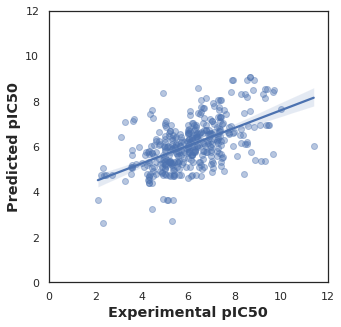

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

# Comparer les régresseurs

## Libraries

In [19]:
#! pip install lazypredict
#! conda install lightgbm -y
#! conda install tensorflow -y
#! conda install -c intel mkl -y

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

## Comparer les algorithmes de Machine Learning

In [21]:
# Définir et construire le lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

 90%|█████████ | 38/42 [01:56<00:13,  3.36s/it]

[10:42:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


100%|██████████| 42/42 [01:57<00:00,  2.80s/it]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


 95%|█████████▌| 40/42 [01:36<00:04,  2.37s/it]

[10:43:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


100%|██████████| 42/42 [01:37<00:00,  2.32s/it]


In [22]:
# Tableau de performance du train set (sous-ensemble de 80%)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
DecisionTreeRegressor,0.65,0.69,0.79,0.10
ExtraTreeRegressor,0.65,0.69,0.79,0.23
ExtraTreesRegressor,0.65,0.69,0.79,6.61
GaussianProcessRegressor,0.65,0.69,0.79,2.25
RandomForestRegressor,0.61,0.65,0.84,1.63
BaggingRegressor,0.59,0.63,0.86,0.27
MLPRegressor,0.52,0.57,0.93,2.55
LGBMRegressor,0.51,0.56,0.93,0.32
HistGradientBoostingRegressor,0.51,0.56,0.93,10.22


In [23]:
# Tableau de performance du test set (sous-ensemble de 20%)
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
NuSVR,-0.16,0.30,1.22,0.33
GradientBoostingRegressor,-0.17,0.30,1.22,0.73
XGBRegressor,-0.19,0.28,1.23,0.57
SVR,-0.21,0.27,1.24,0.41
HistGradientBoostingRegressor,-0.21,0.27,1.24,1.06
LGBMRegressor,-0.21,0.27,1.24,0.29
MLPRegressor,-0.22,0.27,1.25,2.50
RandomForestRegressor,-0.23,0.26,1.25,1.61
BayesianRidge,-0.25,0.25,1.26,0.09


## Visualisation des données de la performance des modèles

[(0.0, 1.0)]

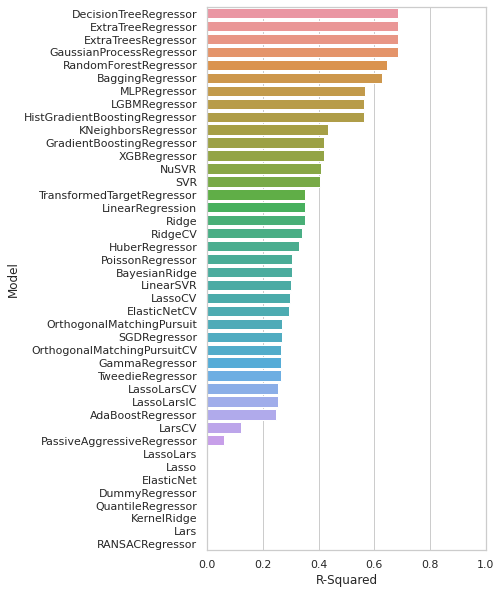

In [24]:
# Bar plot des valeurs r2
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

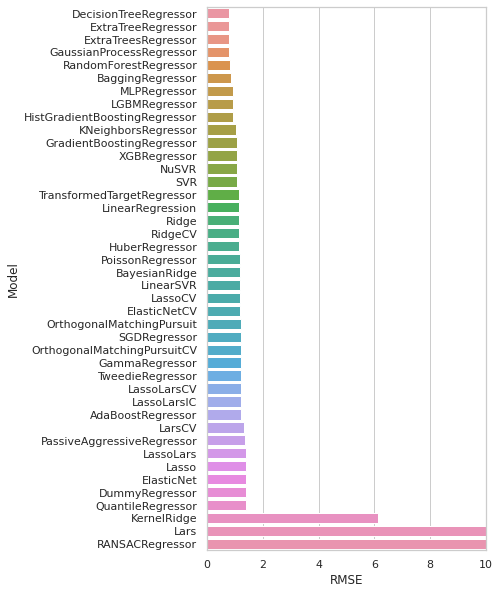

In [25]:
# Bar plot des valeurs RMSE
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

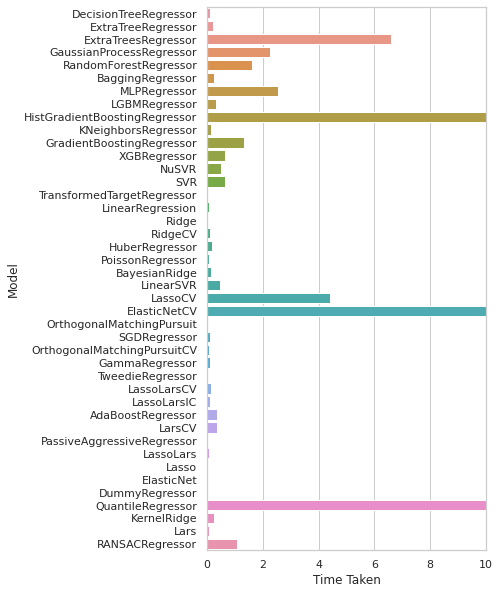

In [26]:
# Bar plot du calcul du temps
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))

## Création d'un modèle DecisionTreeRegressor


In [60]:
from sklearn.tree import DecisionTreeRegressor 
# Building the model
decision_tree_model = DecisionTreeRegressor(random_state = 0)
# Training the model
decision_tree_model.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=0)

In [61]:
# Computing the importance of each feature
# Feature Importance
feature_importance = decision_tree_model.feature_importances_

# Calcul du score
decision_tree_model.score(X_train, Y_train)

0.6857343507246396

In [62]:
decision_tree_model.score(X_test, Y_test)

0.05207340291840379

In [63]:
prediction=decision_tree_model.predict(X_test)


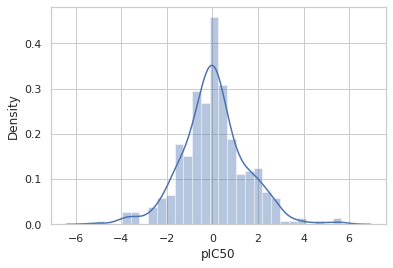

In [64]:
# checking difference between labled y and predicted y
sns.distplot(Y_test-prediction)

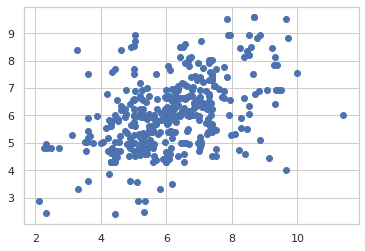

In [65]:
plt.scatter(Y_test,prediction)

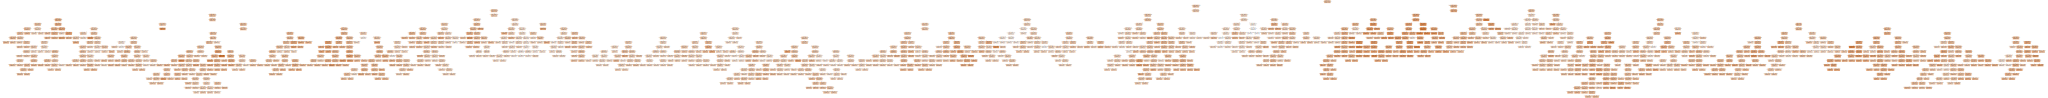

In [66]:
import graphviz 

# DOT data
dot_data = tree.export_graphviz(decision_tree_model, out_file=None, filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph


In [67]:
graph.render("decision_tree_graphivz")

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.525306 to fit


'decision_tree_graphivz.png'

## Ajustement des hyperparamètres

On constate que DecisionTreeRegressor est le modèle le plus performant, mais il peut encore être affiné.

Nous utilisons GridSearchCV pour trouver la meilleure combinaison d'hyperparamètres pour le modèle DecisionTreeRegressor.

In [70]:
# Hyper parameters range intialization for tuning 

parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

In [71]:
# calculating different regression metrics

from sklearn.model_selection import GridSearchCV

In [77]:
hyperparameters_tuning_model=GridSearchCV(decision_tree_model,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)

In [78]:
# function for calculating how much time take for hyperparameter tuning

def timer(start_time=None):
    if not start_time:
        start_time=datetime.now()
        return start_time
    elif start_time:
        thour,temp_sec=divmod((datetime.now()-start_time).total_seconds(),3600)
        tmin,tsec=divmod(temp_sec,60)
        #print(thour,":",tmin,':',round(tsec,2))

In [80]:
%%capture
from datetime import datetime

start_time=timer(None)

hyperparameters_tuning_model.fit(X,Y)

timer(start_time)

In [81]:
# best hyperparameters 
hyperparameters_tuning_model.best_params_

{'max_depth': 5,
 'max_features': 'sqrt',
 'max_leaf_nodes': 10,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'random'}

In [82]:
# best model score
hyperparameters_tuning_model.best_score_

-1.7630463459425476

In [83]:
hyperparameters_tuned_model= DecisionTreeRegressor(max_depth=5,
                                                   max_features='auto',
                                                   max_leaf_nodes=50,
                                                   min_samples_leaf=2,
                                                   min_weight_fraction_leaf=0.1,
                                                   splitter='random')

# fitting model
hyperparameters_tuned_model.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=5, max_features='auto', max_leaf_nodes=50,
                      min_samples_leaf=2, min_weight_fraction_leaf=0.1,
                      splitter='random')

In [84]:
# prediction 
hyperparameters_tuned_prediction = hyperparameters_tuned_model.predict(X_test)

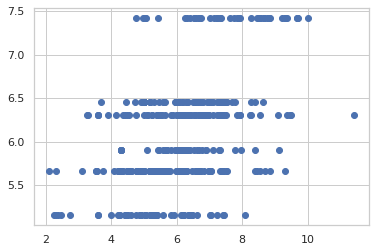

In [86]:
plt.scatter(Y_test,hyperparameters_tuned_prediction)

In [87]:
# With hyperparameter tuned 

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(Y_test,hyperparameters_tuned_prediction))
print('MSE:', metrics.mean_squared_error(Y_test, hyperparameters_tuned_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, hyperparameters_tuned_prediction)))

MAE: 1.0057270185861023
MSE: 1.6875609122226674
RMSE: 1.299061550590528


In [88]:
# without hyperparameter tuning 

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(Y_test,prediction))
print('MSE:', metrics.mean_squared_error(Y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, prediction)))

MAE: 1.031362496761801
MSE: 2.00816466060708
RMSE: 1.417097265753865
